**Import Library**

In [476]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [490]:
df = pd.read_csv('C:/Users/abu_s/Desktop/storeprofit.csv')


In [569]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store's          200 non-null    int64  
 1   Marketing Spend  200 non-null    float64
 2   Administration   200 non-null    float64
 3   Transport        200 non-null    float64
 4   State            200 non-null    object 
 5   Profit           200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB
None


In [571]:
print(df.describe())


           Store's  Marketing Spend  Administration     Transport  \
count   200.000000       200.000000      200.000000    200.000000   
mean    655.000000     21645.673800    20000.630700  19600.001066   
std     502.064582      7582.850455    11216.574379   7567.975681   
min     101.000000     10071.960000     5652.610000   7071.960000   
25%     150.750000     14657.110000    13059.187500  12893.575000   
50%    1100.500000     22086.110000    20157.060000  20236.110000   
75%    1150.250000     26253.860000    23902.030000  24306.065000   
max    1200.000000     44069.950000   136897.800000  42429.950000   

             Profit  
count    200.000000  
mean   25982.108800  
std     7672.440128  
min    12671.960000  
25%    19230.132500  
50%    26817.060000  
75%    30659.377500  
max    49169.950000  


In [493]:
df.head(3)


,Store's,Marketing Spend,Administration,Transport,State,Profit
0,101,11452.61,136897.80,9452.61,Michigan,14452.61
1,102,16259.70,15259.70,NaN,Michigan,19259.70
2,103,15344.51,14344.51,14144.51,Michigan,18344.51


In [495]:
df.shape

(200, 6)

In [498]:
# Find is there any null value
df.isnull().sum()

Store's            0
Marketing Spend    0
Administration     4
Transport          3
State              1
Profit             0
dtype: int64

# **Fill Null Value With Mean, Median, Mood**

In [501]:
mean_transport = df["Transport"].mean()
median_admi = df["Administration"].median()  # if space is part of the column name
mood_state = df["State"].mode()[0]

In [503]:
mean_transport


19600.001065989847

In [505]:
median_admi

20157.06

In [507]:
mood_state

'Illinois'

In [509]:
df['Transport'] = df['Transport'].fillna(mean_transport) 

In [511]:
df['Administration'] = df['Administration'].fillna(median_admi) 

In [513]:
df['State'] = df['State'].fillna(mood_state) 

In [515]:
df.isnull().sum()

Store's            0
Marketing Spend    0
Administration     0
Transport          0
State              0
Profit             0
dtype: int64

# **Graph Use Matplotlib And Seaborn**

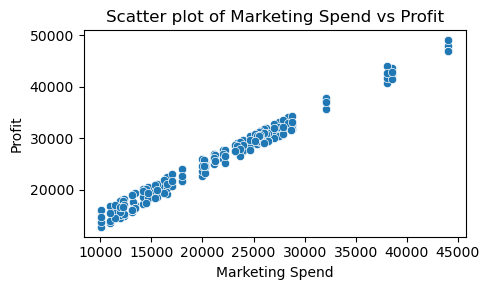

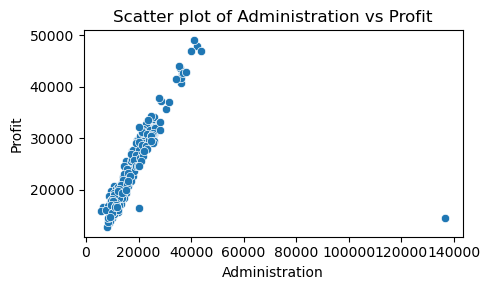

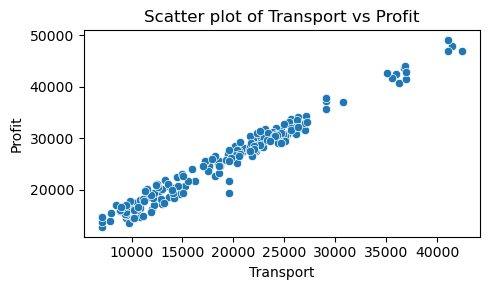

In [517]:
# Assuming df is your DataFrame and you want to plot 'x' vs 'y'
x_columns = ['Marketing Spend', 'Administration', 'Transport']  # replace with your actual column names
y = 'Profit'  # your y-axis column

# Loop through each x column and plot a scatterplot
for x in x_columns:
    plt.figure(figsize=(5, 3))  # Create a new figure for each plot
    sns.scatterplot(x=x, y=y, data=df)
    plt.title(f'Scatter plot of {x} vs {y}')
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the plot for each x

# **Separtate X, Y**


In [520]:
x = df.drop(['Profit'], axis=True)


In [522]:
y = df['Profit']

# **Used One Hot Encoding**

In [526]:
#state = pd.get_dummies(x['Area'],drop_first=True) # also we can use pandas get_dummies Library

In [529]:
# use one hot encode from sklearn.preprocessing
state_OHE = OneHotEncoder(sparse_output=False)

# Apply the encoder to the categorical column and fit-transform the data
one_hot_encoded = state_OHE.fit_transform(x[['State']])

# Convert the result into a DataFrame for easier viewing
State_one_hot_encoded = pd.DataFrame(one_hot_encoded, columns=state_OHE.get_feature_names_out(['State']))

State_one_hot_encoded.head(3)

,State_Illinois,State_Michigan,State_Ohio,State_indiana
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0


In [531]:
x.head()

,Store's,Marketing Spend,Administration,Transport,State
0,101,11452.61,136897.80,9452.610000,Michigan
1,102,16259.70,15259.70,19600.001066,Michigan
2,103,15344.51,14344.51,14144.510000,Michigan
3,104,14437.41,13437.41,13237.410000,Michigan
4,105,14210.34,13210.34,13010.340000,Michigan


In [533]:
#concat both x, and encoded data inside in x
x = pd.concat([x, State_one_hot_encoded],axis = 1)

In [535]:
x.head()


,Store's,Marketing Spend,Administration,Transport,State,State_Illinois,State_Michigan,State_Ohio,State_indiana
0,101,11452.61,136897.80,9452.610000,Michigan,0.0,1.0,0.0,0.0
1,102,16259.70,15259.70,19600.001066,Michigan,0.0,1.0,0.0,0.0
2,103,15344.51,14344.51,14144.510000,Michigan,0.0,1.0,0.0,0.0
3,104,14437.41,13437.41,13237.410000,Michigan,0.0,1.0,0.0,0.0
4,105,14210.34,13210.34,13010.340000,Michigan,0.0,1.0,0.0,0.0


In [537]:
# drop state collaum as we don't  have use it
x = x.drop('State', axis=1)

In [539]:
x.head(3)

,Store's,Marketing Spend,Administration,Transport,State_Illinois,State_Michigan,State_Ohio,State_indiana
0,101,11452.61,136897.80,9452.610000,0.0,1.0,0.0,0.0
1,102,16259.70,15259.70,19600.001066,0.0,1.0,0.0,0.0
2,103,15344.51,14344.51,14144.510000,0.0,1.0,0.0,0.0


# **Linear Regression**

In [543]:
# use 75% of data for train as small dataset 
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [546]:
regressor = LinearRegression()

In [548]:
regressor.fit(xtrain, ytrain)

LinearRegression()

In [550]:
#this time show the tail 
xtest.tail(3)

,Store's,Marketing Spend,Administration,Transport,State_Illinois,State_Michigan,State_Ohio,State_indiana
19,120,26419.70,23859.70,24619.70,0.0,0.0,1.0,0.0
143,1144,15505.73,13505.73,12505.73,0.0,0.0,0.0,1.0
86,187,28663.76,25763.76,25663.76,1.0,0.0,0.0,0.0


In [552]:
pred = regressor.predict(xtest)

In [554]:
pred_profit =pd.DataFrame(pred )


In [557]:
regressor.score(xtest,ytest)

0.9847442350282432

# **R- Squared Value**

In [560]:
scoure=r2_score(ytest,pred)

In [562]:
scoure

0.9847442350282432

# **Graph Use Matplotlib And Seaborn**

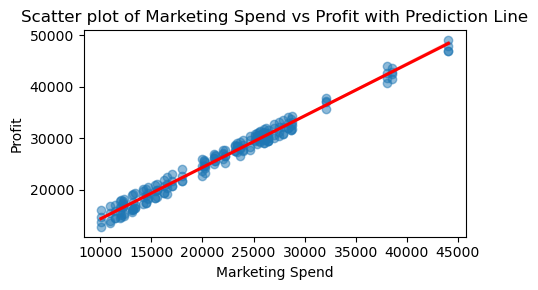

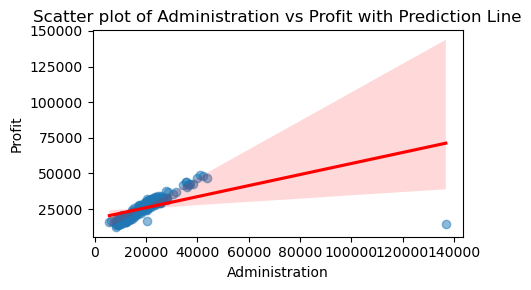

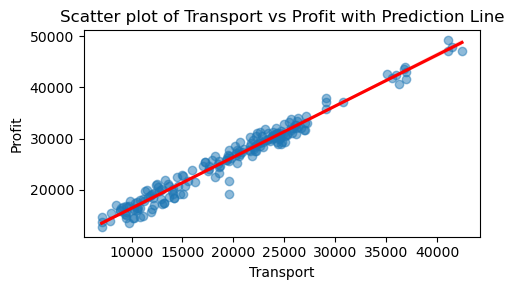

In [565]:
for x in x_columns:
    plt.figure(figsize=(5, 3))  # Create a new figure for each plot
    y = 'Profit'  # Your y-axis column
    sns.regplot(x=x, y= y, data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})  # Add a regression line
    plt.title(f'Scatter plot of {x} vs {y} with Prediction Line')
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the plot for each x